[[219  24]
 [ 32  25]]
              precision    recall  f1-score   support

          No       0.87      0.90      0.89       243
         Yes       0.51      0.44      0.47        57

    accuracy                           0.81       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.80      0.81      0.81       300

              precision    recall  f1-score   support

          No       0.92      0.94      0.93       235
         Yes       0.78      0.71      0.74        65

    accuracy                           0.89       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.89      0.89      0.89       300

testing_accuracy: 0.8133333333333334
training_accuracy: 0.8933333333333333
lets consider 80% as a good accuracy
good fitting
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3               

<ipython-input-3-cf186bf5d109>:137: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sqrt(sum/len(C))


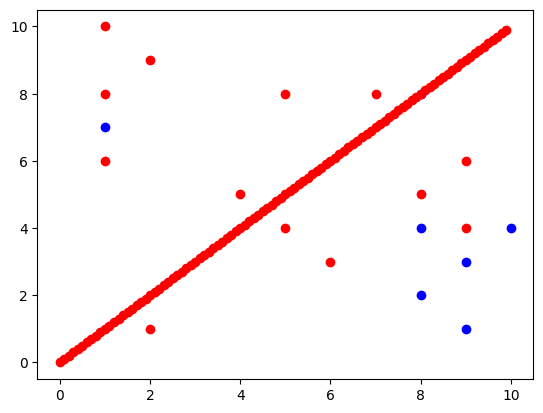

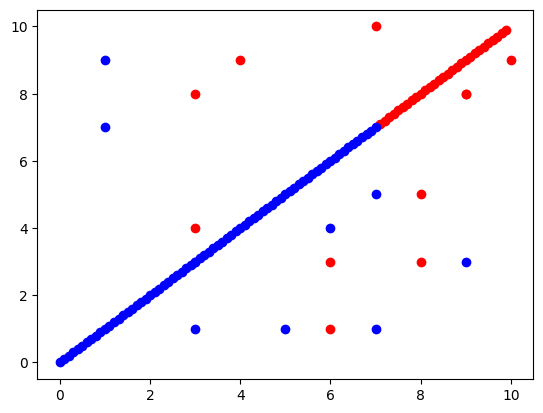

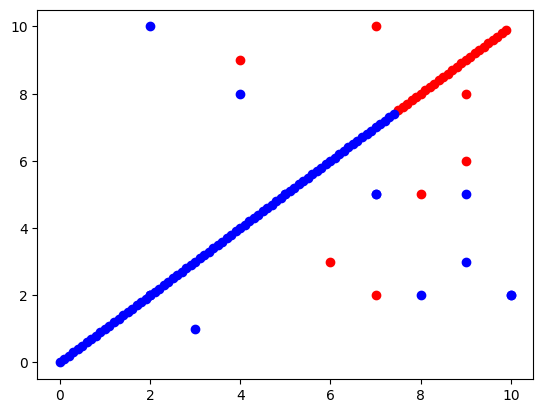

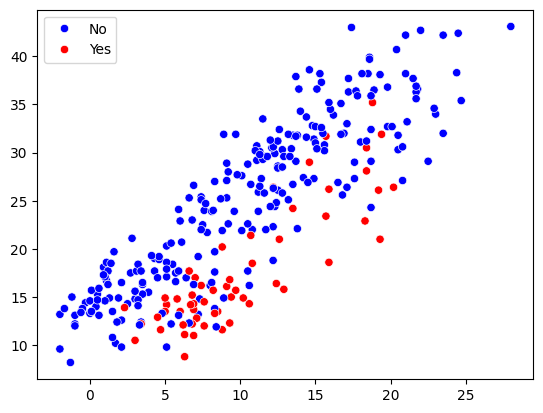

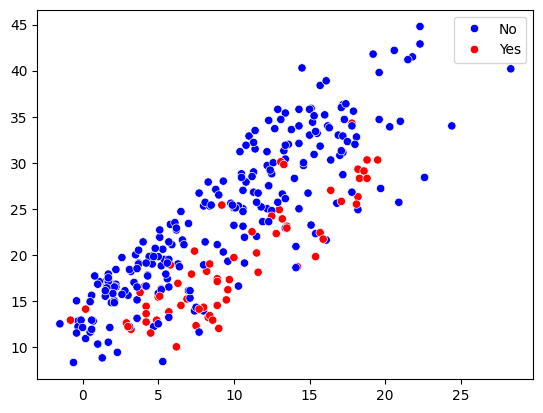

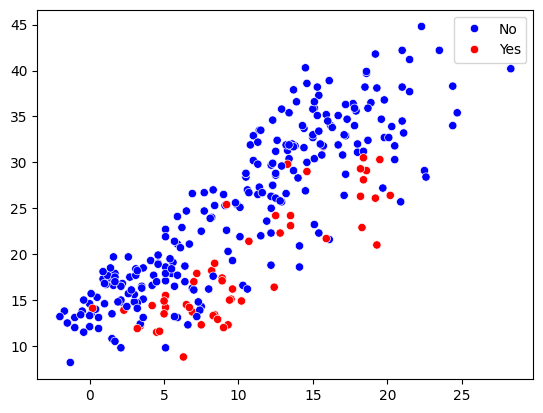

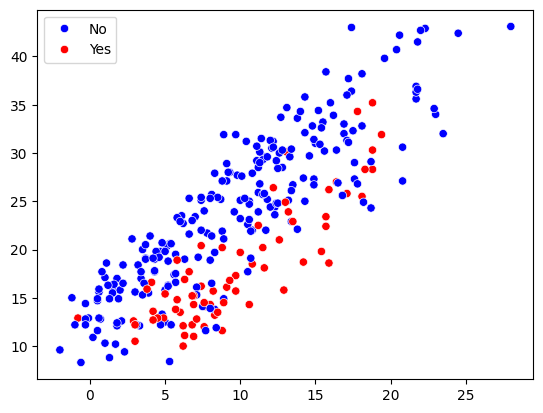

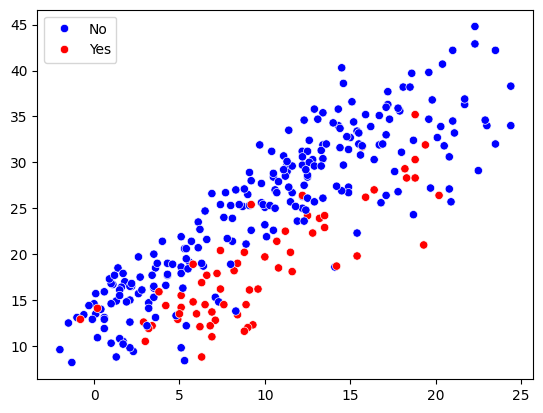

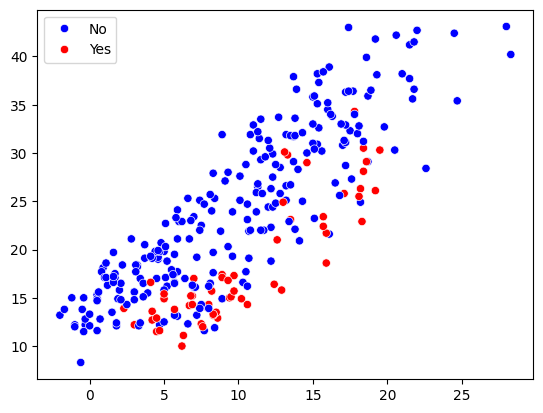

best K value: {'n_neighbors': 22}


In [3]:
#importing panda to access the dataset/plotting
import pandas as pd
#importing numpy to access the array functions
import numpy as np
#importing matplotlib to plot the histogram
import matplotlib.pyplot as plt
#importing sklearn to remove Nan values, split the train and test set, confusion matrix, f1 score, recall
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt

df = pd.read_csv("/content/weatherAUS.csv")
df=pd.DataFrame(df)

#merging 2 features in one array as base set
def removeNull(Class):
    iterate=df[Class]
    y=[]
    mean=df[Class].mean(axis=0)
    for i in iterate:
        if(math.isnan(i)):
            y.append(mean)
        else:
            y.append(i)
    y=pd.DataFrame(y)
    df[Class]=y
removeNull('MinTemp')
removeNull('MaxTemp')

def isNaN(string):
    return string != string
def removeNullCategorical(Class):
    iterate=df[Class]
    y=[]
    mostfreq=df[Class].value_counts().idxmax()
    for i in iterate:
        if(isNaN(i)):
            y.append(mostfreq)
        else:
            y.append(i)
    y=pd.DataFrame(y)
    df[Class]=y
    return y
removeNullCategorical('RainToday')
y=df['RainToday'].to_numpy()
y=y[:600]
X=df[['MinTemp','MaxTemp']].to_numpy()
X=X[:600]

#splitting the data into train and set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

#applying KNN of K=3
neigh=KNeighborsClassifier(n_neighbors=3)

#training the model
neigh.fit(X_train,y_train)

#returning the prediction vector predicted by the model
test_vector=neigh.predict(X_test)

#returning the confusion matrix and the report
print(confusion_matrix(y_test, test_vector))
print(classification_report(y_test,test_vector))

#returning the prediction vector predicted by the model
test_vector=neigh.predict(X_train)
#returning the confusion matrix and the report
print(classification_report(y_train,test_vector))

#returning the accuracy of the model with respect to testing model

print('testing_accuracy:',neigh.score(X_test,y_test))
print('training_accuracy:',neigh.score(X_train,y_train))

test_accuracy=neigh.score(X_test,y_test)
train_accuracy=neigh.score(X_train,y_train)
print("lets consider 80% as a good accuracy")

def checkfitting(test_accuracy,train_accuracy):
    if(train_accuracy < 0.80):
        return ("underfitting")
    elif(train_accuracy > 0.80 and test_accuracy > 0.80):
        return ("good fitting")
    elif(test_accuracy < 0.80):
        return ("Overfitting")
print(checkfitting(test_accuracy,train_accuracy))

#Lab3
#convert the execel contents to dataframe
df = pd.read_excel("/content/Lab_Session1_Data.xlsx", sheet_name='Purchase data')
df=pd.DataFrame(df)
print(df)
#convert datafram to array
Array=df.to_numpy()
A=Array[:,1:4]
C=Array[:,4:5]
#typecast the elements to float
A=np.float64(A)
#return the pseudoinverse
pinv=np.linalg.pinv(A)
print("pseudo inverse:",pinv)

#calculating the cost of each product
print("Costs of the products:",np.matmul(pinv,C))
pinv2=np.matmul(pinv,C)

#comparing real prices with the model for calculating prices
print("real prices:",C)
predicted=np.matmul(A,pinv2)
print("model of calculating prices:",predicted)

#funtion to calculate MSE
def MSE(C,predicted):
    sum=0
    for i in range(len(C)):
        sub=0
        sub=C[i]-predicted[i]
        sub=sub*sub
        sum+=sub
    return sum/len(C)
print("Mean squared error:",MSE(C,predicted))

#funtion to calculate RMSE
def RMSE(C,predicted):
    sum=0
    for i in range(len(C)):
        sub=0
        sub=C[i]-predicted[i]
        sub=sub*sub
        sum+=sub
    return math.sqrt(sum/len(C))
print("RMSE:",RMSE(C,predicted))

#funtion to calculate MAPE
def MAPE(C,predicted):
    sum=0
    for i in range(len(C)):
        sub=0
        sub=C[i]-predicted[i]
        sub=abs((sub)/C[i])
        sum+=sub
    return sum/len(C)
print("MAPE:",MAPE(C,predicted))

#funtion to calculate R2 score
def R2(C,predicted):
    rss=0
    for i in range(len(C)):
        err=0
        err=C[i]-predicted[i]
        rss += err*err
    tss=0
    mean=np.mean(predicted)
    for i in range(len(C)):
        err=0
        err=C[i]-mean
        tss += err*err
    return 1-(rss/tss)
print("R2",R2(C,predicted))

#A2-A5
def classify(k):
    x=np.random.randint(1,11,size=20)
    y=np.random.randint(1,11,size=20)

    #initialzing the data co-ordinates
    c0x=[]
    c0y=[]
    c1x=[]
    c1y=[]
    class0=[]
    class1=[]

    #sum of the datapoints
    #if even Class0
    #else Class1
    target=[]
    for i in range(20):
        if((x[i]+y[i])% 2==0):
            c0x.append(x[i])
            c0y.append(y[i])
            target.append("blue")
        else:
            c1x.append(x[i])
            c1y.append(y[i])
            target.append("red")
    class0.append(c0x)
    class0.append(c0y)
    class1.append(c1x)
    class1.append(c1y)

    x=np.array(x)
    y=np.array(y)
    X=[]
    X.append(x)
    X.append(y)
    X=np.array(X)
    X=X.transpose()
    y_train=target

    #plotting the class1 and class2
    plt.scatter(class1[0],class1[1],color='red',label='class1')
    plt.scatter(class0[0],class0[1],color='blue',label='class0')

    x=np.arange(0,10,0.1)
    y=np.arange(0,10,0.1)

    X_test=[]
    X_test.append(x)
    X_test.append(y)
    X_test=np.array(X_test)
    X_test=X_test.transpose()

    neigh=KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X,y_train)
    test_points=neigh.predict(X_test)
    test_points=np.array(test_points)
    c0x=[]
    c0y=[]
    c1x=[]
    c1y=[]
    class0=[]
    class1=[]
    for i in range(len(test_points)):
        if(test_points[i]=="blue"):
            c0x.append(x[i])
            c0y.append(y[i])
        else:
            c1x.append(x[i])
            c1y.append(y[i])
    class0.append(c0x)
    class0.append(c0y)
    class1.append(c1x)
    class1.append(c1y)
    plt.scatter(class1[0],class1[1],color='red')
    plt.scatter(class0[0],class0[1],color='blue')
    plt.show()
classify(3)
classify(2)
classify(4)

#A6
def classifyData(X,y,k):
    #splitting the data into train and set
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
    #applying KNN of K=3
    neigh=KNeighborsClassifier(n_neighbors=k)
    x=X_train[:,0]
    y=X_train[:,1]
    x=x.transpose()
    y=y.transpose()

    #training the model
    neigh.fit(X_train,y_train)
    #returning the prediction vector predicted by the model
    test_vector=neigh.predict(X_test)
    f2=plt.figure(1)
    sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette=['blue','red'])
    f2=plt.figure(2)
    sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette=['blue','red'])
    plt.show()
classifyData(X,y,3)
classifyData(X,y,4)
classifyData(X,y,2)

#A7
#splitting the data into train and set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
#applying KNN of K=3
neigh=KNeighborsClassifier(n_neighbors=3)

#initialzing n_neighbors
parameters={'n_neighbors':sp_randInt(1,100)}

#call randomized Search CV to tune the hyperparameter
clf = RandomizedSearchCV(neigh, param_distributions=parameters,random_state=0)
search=clf.fit(X,y)
print("best K value:",search.best_params_)
